In [1]:
import sys
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
rawData = pd.read_csv("data/data.csv")
print("Size of the raw data: %s" % str(rawData.shape))
rawData.head()

Size of the raw data: (6819, 96)


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [3]:
print("There are %d null values in the raw data." % (rawData.isnull().values.sum()))
rawData.isnull().sum(axis = 0)

There are 0 null values in the raw data.


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

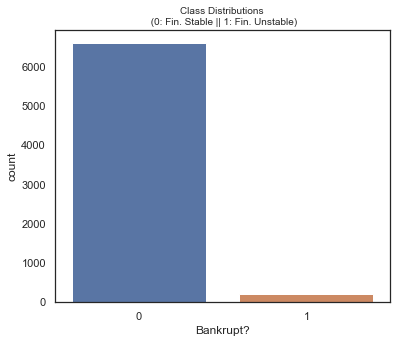

In [4]:
sns.set_theme(style="white")

plt.figure(figsize=(6, 5))
sns.countplot(x=rawData["Bankrupt?"])
plt.title("Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)", fontsize=10)
plt.show()

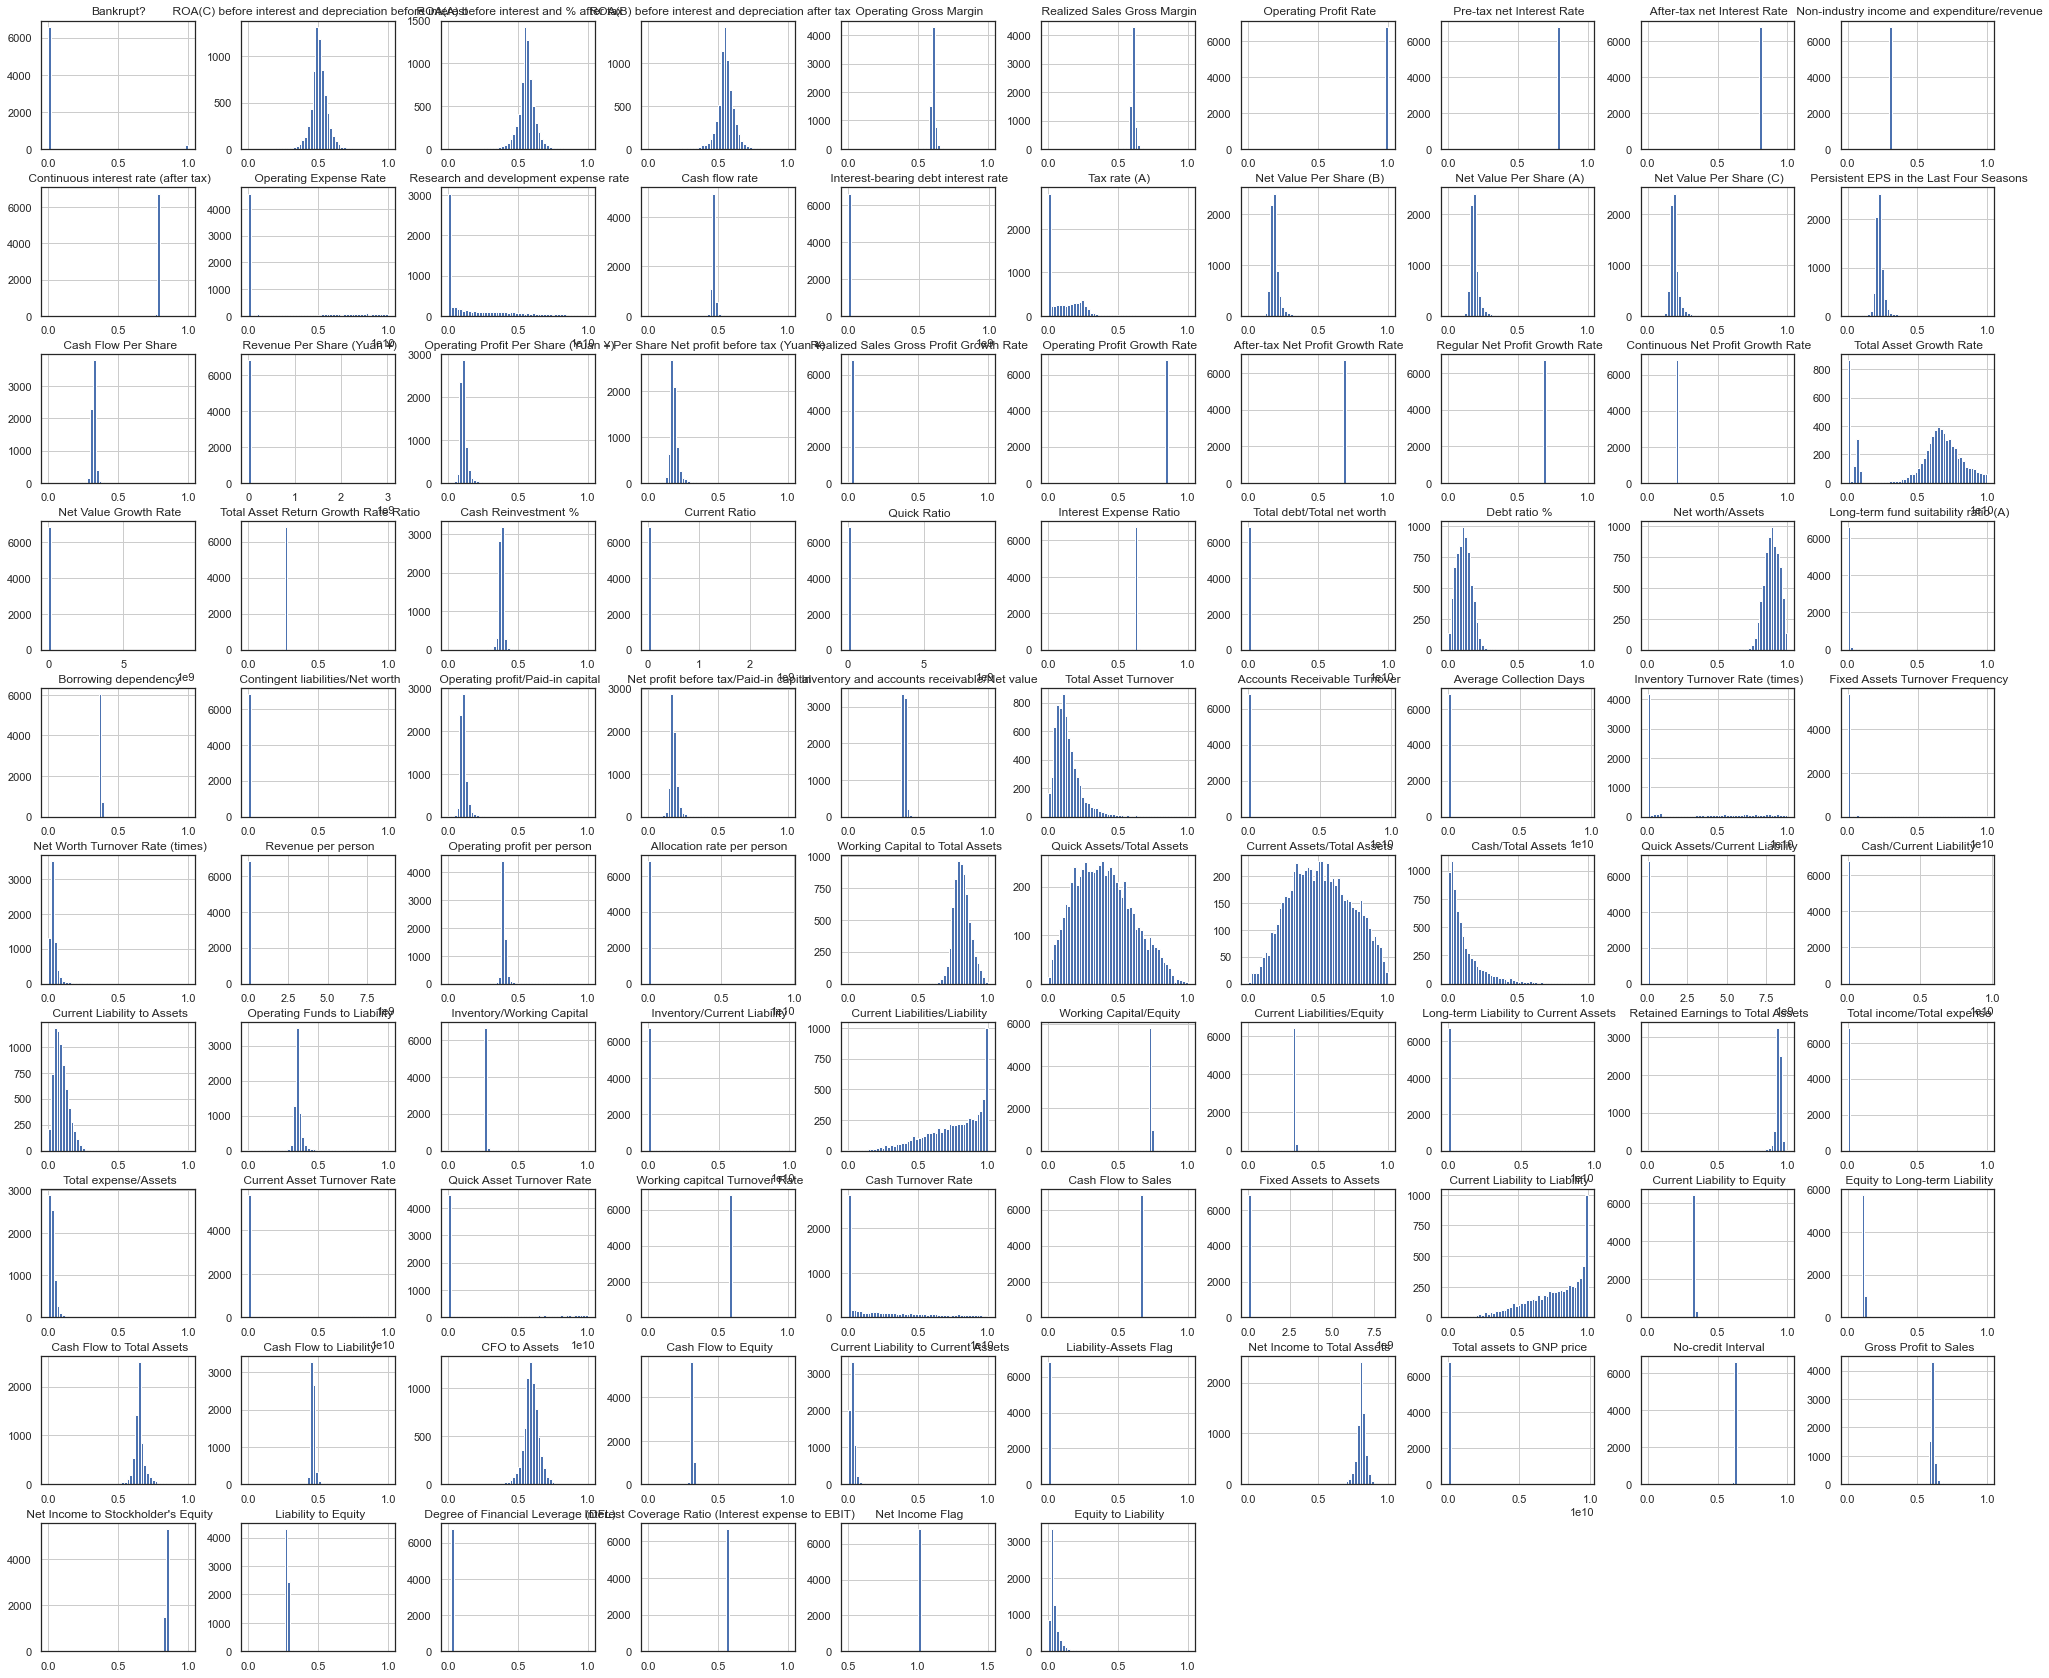

In [5]:
rawData.hist(figsize=(35, 30), bins=50)
plt.show()

In [6]:
X_raw = rawData.iloc[:, 1:]
y_raw = rawData.iloc[:, 0]
TARGET_COL = y_raw.name

In [7]:
min_max_scaler = preprocessing.RobustScaler()
X_scaled = min_max_scaler.fit_transform(X_raw)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X_raw.columns
X_scaled.head()


ROA(C) before interest and depreciation before interest  \
0                                          -2.237820          
1                                          -0.650702          
2                                          -1.298101          
3                                          -1.742362          
4                                          -0.638315          

    ROA(A) before interest and % after tax  \
0                                -2.525674   
1                                -0.402644   
2                                -1.133706   
3                                -2.024403   
4                                -0.398577   

    ROA(B) before interest and depreciation after tax  \
0                                          -2.578427    
1                                          -0.625530    
2                                          -1.407442    
3                                          -1.663683    
4                                          -0.527555    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.337079                     -0.337006   
1                 0.314607                      0.317657   
2                -0.337614                     -0.343994   
3                -1.667202                     -1.673206   
4                -0.535581                     -0.536415   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0               -0.423237                   -2.987097   
1               -0.608575                   -0.432258   
2               -1.315814                   -5.493907   
3               -2.573536                   -2.573477   
4               -0.391886                   -0.505376   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                     -3.588770                                     -7.392276   
1                     -0.472337                                      0.260163   
2                     -6.264244                                    -12.532520   
3                     -2.597853                                     -1.479675   
4                     -0.453344                                     -0.424797   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                              -3.856786  ...                    -3.156866   
1                              -0.765196  ...                    -0.515808   
2                              -8.014988  ...                    -1.210225   
3                              -2.337219  ...                    -2.392368   
4                              -0.503747  ...                    -0.525276   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    1.633983            -1.880597               -0.337407   
1                    1.428737            -0.427692                0.314634   
2                    8.684444            -0.071798               -0.337700   
3                    0.267343            -1.787063               -1.667413   
4                    0.410510            -0.674068               -0.535752   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                            -5.926656              2.535950   
1                            -0.539430              1.125074   
2                            -1.964374              2.532984   
3                            -2.890800              0.653418   
4                            -0.537879             -0.058557   

    Degree of Financial Leverage (DFL)  \
0                            -1.700396   
1                          1948.484160   
2                            -2.076630   
3                            -0.913658   
4                           -16.850935   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                          -2.122174                 0.0   
1                                           8.693092                 0.0   
2         

In [8]:
varThresh = 1e-4
varByCol = rawData.var(axis=0)
print("There are %d columns with low variance < %s" % (len(varByCol[varByCol < varThresh]), str(varThresh)))
print(varByCol[varByCol < varThresh])

There are 4 columns with low variance < 0.0001
 Total Asset Return Growth Rate Ratio    0.000093
 Working capitcal Turnover Rate          0.000080
 Cash Flow to Sales                      0.000087
 Net Income Flag                         0.000000
dtype: float64


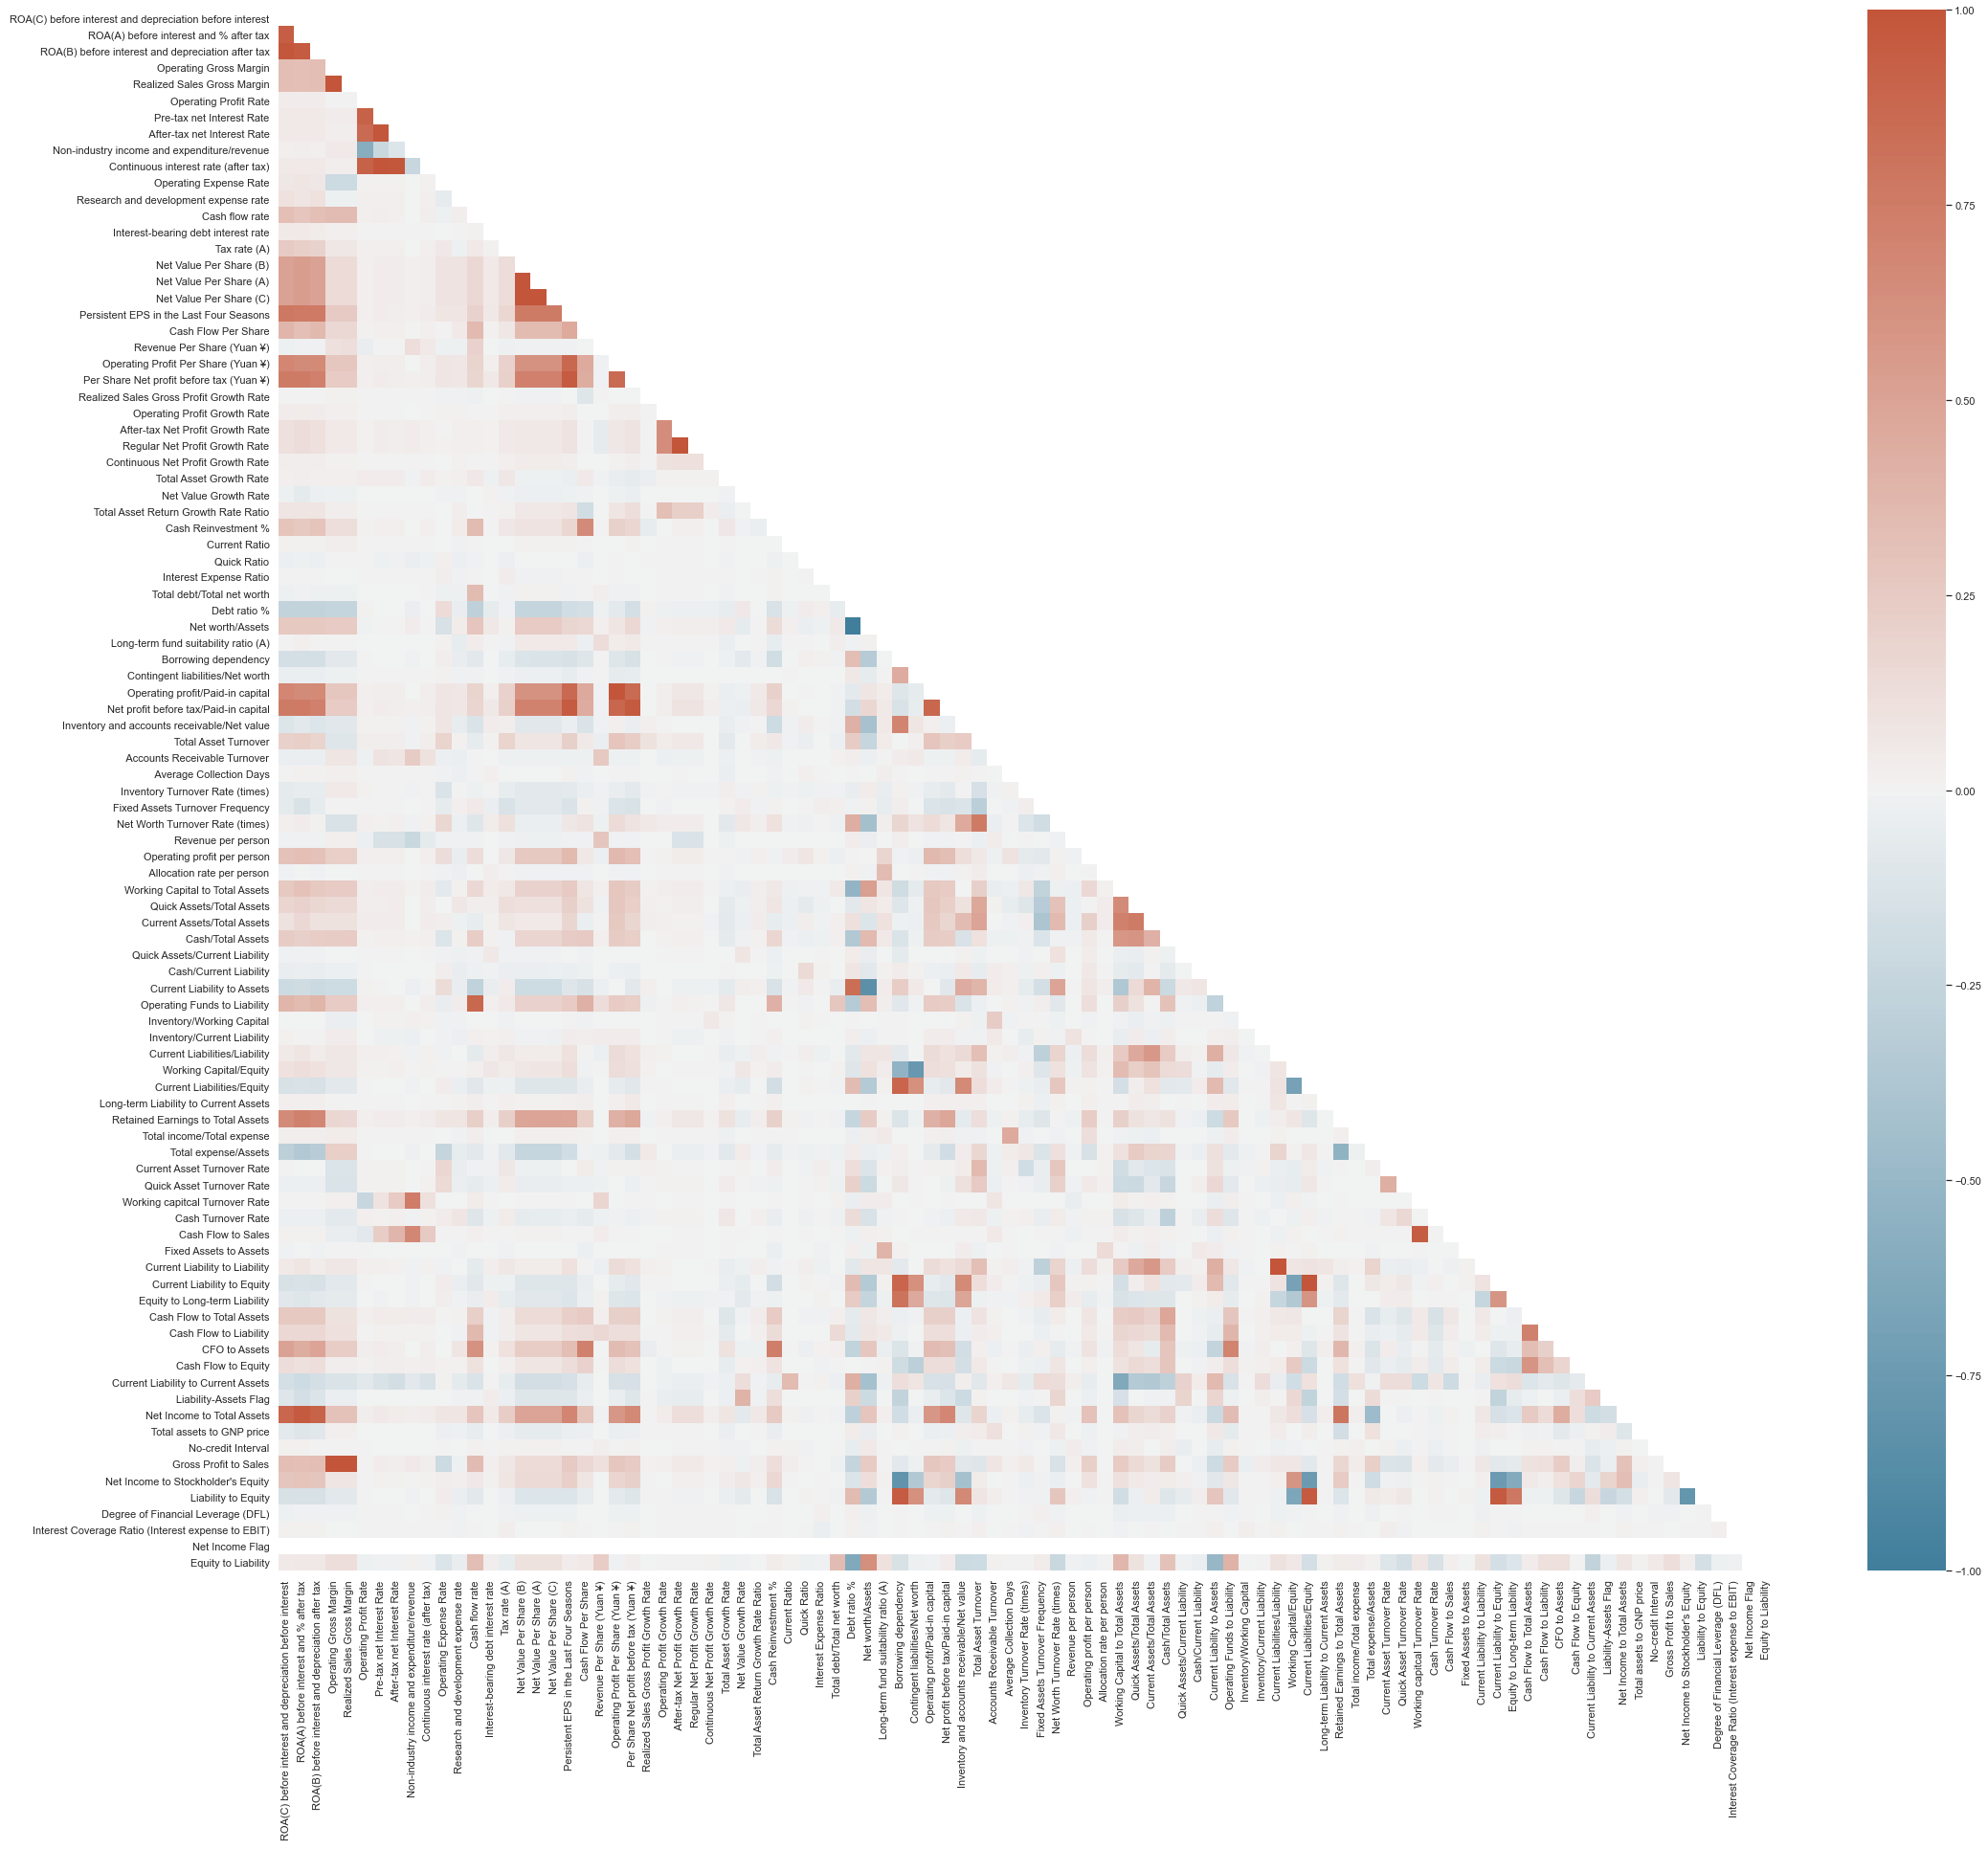

In [9]:
corrMatrix = X_scaled.corr()
maskMatrix = np.triu(np.ones_like(corrMatrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(35, 30))
sns.heatmap(corrMatrix, mask=maskMatrix, cmap=cmap, annot=False)
plt.show()

In [13]:
if "multiCollinearityEliminator" in sys.modules: 
    reload(sys.modules["multiCollinearityEliminator"])
from multiCollinearityEliminator import MultiCollinearityEliminator

corrThresh = 0.95
mce = MultiCollinearityEliminator(pd.concat([y_raw, X_scaled], axis=1), TARGET_COL, corrThresh)
X_clean = mce.autoEliminateMulticollinearity()
X_clean.drop(columns=TARGET_COL, inplace=True)
X_clean.head()

Operating Profit Rate   After-tax net Interest Rate  \
0               -0.423237                     -3.588770   
1               -0.608575                     -0.472337   
2               -1.315814                     -6.264244   
3               -2.573536                     -2.597853   
4               -0.391886                     -0.453344   

    Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                     -7.392276            -3.668564e-14   
1                                      0.260163             2.901374e-15   
2                                    -12.532520            -1.004322e-14   
3                                     -1.479675            -4.098191e-14   
4                                     -0.424797             1.903498e+00   

    Research and development expense rate   Cash flow rate  \
0                               -0.147536        -0.734328   
1                               -0.147536        -0.340082   
2                               -0.140145        -0.694370   
3                               -0.147536         0.066240   
4                               -0.147536        -0.247025   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              1.226100       -0.35702   
1                              0.989378       -0.35702   
2                              1.423369       -0.35702   
3                              0.388467       -0.35702   
4                              1.107739       -0.35702   

    Net Value Per Share (A)   Persistent EPS in the Last Four Seasons  ...  \
0                 -1.404221                                 -2.298039  ...   
1                 -0.082792                                 -0.647059  ...   
2                 -0.250000                                 -1.823529  ...   
3                 -1.163961                                 -1.278431  ...   
4                 -0.650974                                 -0.498039  ...   

    Liability-Assets Flag   Net Income to Total Assets  \
0                     0.0                    -3.156866   
1                     0.0                    -0.515808   
2                     0.0                    -1.210225   
3                     0.0                    -2.392368   
4                     0.0                    -0.525276   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    1.633983            -1.880597               -0.337407   
1                    1.428737            -0.427692                0.314634   
2                    8.684444            -0.071798               -0.337700   
3                    0.267343            -1.787063               -1.667413   
4                    0.410510            -0.674068               -0.535752   

    Net Income to Stockholder's Equity   Degree of Financial Leverage (DFL)  \
0                            -5.926656                            -1.700396   
1                            -0.539430                          1948.484160   
2                            -1.964374                            -2.076630   
3                            -2.890800                            -0.913658   
4                            -0.537879                           -16.850935   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                          -2.122174                 0.0   
1                                           8.693092                 0.0   
2                                          -2.729675                 0.0   
3                                          -1.039192                 0.0   
4                                          18.302075                 0.0   

    Equity to Liability  
0             -0.611011  
1             -0.458493  
2             -0.610821  
3             -0.346085  
4              0.059677  

[5 rows x 79 columns]

In [16]:
droppedColumns = [col for col in X_scaled.columns if col not in X_clean.columns]
print("%d columns were dropped due to high correlation." % len(droppedColumns))
print(droppedColumns)

16 columns were dropped due to high correlation.
[' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Pre-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (B)', ' Net Value Per Share (C)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Current Liabilities/Equity', ' Current Liability to Equity', ' Liability to Equity']
